In [1]:
import pandas as pd
import numpy as np
import unidecode
import html5lib
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv'
d = pd.read_csv(url)

In [6]:
d = d[d['season'] == 2021]
d[d['team1'] == 'Newcastle']

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
44824,2021,2021-08-15,2411,Barclays Premier League,Newcastle,West Ham United,66.47,73.22,0.3533,0.3941,...,31.0,25.2,2.0,4.0,1.71,3.53,1.36,1.84,2.10,4.20
45358,2021,2021-08-28,2411,Barclays Premier League,Newcastle,Southampton,64.50,65.31,0.4219,0.3233,...,38.6,35.4,2.0,2.0,1.21,3.62,0.89,1.71,2.10,2.10
46051,2021,2021-09-17,2411,Barclays Premier League,Newcastle,Leeds United,62.18,69.33,0.3663,0.3868,...,42.0,25.7,1.0,1.0,1.38,1.60,1.58,1.75,1.05,1.05
47488,2021,2021-10-17,2411,Barclays Premier League,Newcastle,Tottenham Hotspur,63.00,74.57,0.3035,0.4559,...,40.1,35.2,2.0,3.0,0.61,1.94,0.87,1.44,2.10,3.15
48089,2021,2021-10-30,2411,Barclays Premier League,Newcastle,Chelsea,62.03,88.87,0.1470,0.6504,...,45.3,45.0,0.0,3.0,0.24,2.59,0.39,2.07,0.00,2.72
48843,2021,2021-11-20,2411,Barclays Premier League,Newcastle,Brentford,61.00,69.45,0.3583,0.3789,...,47.5,24.5,3.0,3.0,2.51,1.11,2.20,0.80,3.15,3.15
49409,2021,2021-11-30,2411,Barclays Premier League,Newcastle,Norwich City,60.49,56.67,0.4765,0.2624,...,41.5,41.8,1.0,1.0,1.13,1.52,0.44,1.92,1.05,0.84
49558,2021,2021-12-04,2411,Barclays Premier League,Newcastle,Burnley,59.35,65.25,0.3567,0.3892,...,37.6,48.6,1.0,0.0,1.55,0.63,0.99,1.09,1.05,0.00
50174,2021,2021-12-19,2411,Barclays Premier League,Newcastle,Manchester City,59.31,94.14,0.0588,0.8219,...,45.7,80.1,0.0,4.0,0.28,3.24,0.73,2.11,0.00,3.80
50317,2021,2021-12-27,2411,Barclays Premier League,Newcastle,Manchester United,58.70,78.20,0.2146,0.5577,...,37.3,48.2,1.0,1.0,1.11,1.97,0.92,1.74,1.05,1.05


In [7]:
d[d['team2'] == 'Newcastle']

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
45051,2021,2021-08-21,2411,Barclays Premier League,Aston Villa,Newcastle,71.45,64.82,0.4917,0.2680,...,22.7,30.3,2.0,0.0,1.31,0.77,1.21,1.07,2.10,0.00
45750,2021,2021-09-11,2411,Barclays Premier League,Manchester United,Newcastle,85.21,62.86,0.7076,0.1138,...,56.1,39.4,4.0,1.0,2.73,0.56,2.46,0.45,3.42,1.05
46532,2021,2021-09-25,2411,Barclays Premier League,Watford,Newcastle,60.15,62.12,0.3874,0.3487,...,45.1,41.7,1.0,1.0,1.06,2.16,0.71,0.89,1.05,1.05
46909,2021,2021-10-02,2411,Barclays Premier League,Wolverhampton,Newcastle,72.93,62.84,0.4887,0.2507,...,22.5,43.8,2.0,1.0,1.01,0.98,0.59,0.35,2.10,1.05
47734,2021,2021-10-23,2411,Barclays Premier League,Crystal Palace,Newcastle,66.98,62.33,0.4461,0.2950,...,32.6,47.4,1.0,1.0,1.97,0.82,1.92,1.26,1.05,1.05
48533,2021,2021-11-06,2411,Barclays Premier League,Brighton and Hove Albion,Newcastle,75.99,60.79,0.5580,0.1978,...,26.4,42.6,1.0,1.0,1.43,0.34,1.38,0.52,1.05,1.05
49191,2021,2021-11-27,2411,Barclays Premier League,Arsenal,Newcastle,76.37,61.87,0.5674,0.1987,...,34.5,43.4,2.0,0.0,3.24,0.24,2.00,0.89,2.10,0.00
49967,2021,2021-12-12,2411,Barclays Premier League,Leicester City,Newcastle,71.26,60.33,0.5349,0.2371,...,13.8,42.9,4.0,0.0,2.10,0.67,0.59,1.09,3.54,0.00
50065,2021,2021-12-16,2411,Barclays Premier League,Liverpool,Newcastle,92.90,59.55,0.8647,0.0401,...,61.7,46.6,3.0,1.0,3.68,0.21,3.49,0.21,2.72,1.05
50765,2021,2022-01-22,2411,Barclays Premier League,Leeds United,Newcastle,68.02,58.74,0.5147,0.2448,...,21.6,44.2,0.0,1.0,1.22,1.19,1.46,1.78,0.00,1.05


In [4]:
d = d[d['league'] == 'UEFA Champions League']
d

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
174,2016,2016-09-13,1818,UEFA Champions League,Paris Saint-Germain,Arsenal,84.65,81.85,0.4587,0.2850,...,NaN,NaN,1.0,1.0,2.59,0.72,1.81,2.30,1.05,1.05
175,2016,2016-09-13,1818,UEFA Champions League,PSV,Atletico Madrid,63.98,90.05,0.2004,0.5349,...,NaN,NaN,0.0,1.0,1.38,1.23,1.83,1.80,0.00,1.05
176,2016,2016-09-13,1818,UEFA Champions League,Dynamo Kiev,Napoli,80.70,76.79,0.3504,0.3697,...,NaN,NaN,1.0,2.0,0.46,1.43,0.48,0.64,1.05,2.10
177,2016,2016-09-13,1818,UEFA Champions League,Bayern Munich,Rostov,94.80,59.97,0.9179,0.0155,...,NaN,NaN,5.0,0.0,3.31,0.21,2.25,0.86,4.74,0.00
178,2016,2016-09-13,1818,UEFA Champions League,Barcelona,Celtic,95.90,62.22,0.8787,0.0398,...,NaN,NaN,7.0,0.0,3.82,0.78,3.88,0.05,6.77,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54363,2021,2022-04-26,1818,UEFA Champions League,Manchester City,Real Madrid,93.35,85.58,0.6058,0.1815,...,100.0,100.0,4.0,3.0,3.31,1.62,1.74,0.98,4.20,3.15
54375,2021,2022-04-27,1818,UEFA Champions League,Liverpool,Villarreal,93.51,81.40,0.6634,0.1344,...,100.0,100.0,2.0,0.0,1.84,0.09,2.48,0.19,2.10,0.00
54663,2021,2022-05-03,1818,UEFA Champions League,Villarreal,Liverpool,79.46,93.92,0.2065,0.5609,...,100.0,100.0,2.0,3.0,1.48,1.59,0.86,1.61,2.10,3.15
54674,2021,2022-05-04,1818,UEFA Champions League,Real Madrid,Manchester City,85.82,93.69,0.2964,0.4737,...,100.0,100.0,3.0,1.0,2.60,1.73,2.40,1.84,3.15,1.05


In [5]:
finalists = {2016 : ['Real Madrid', 'Juventus'],
             2017 : ['Real Madrid', 'Liverpool'],
             2018 : ['Liverpool', 'Tottenham Hotspur'],
             2019 : ['Bayern Munich', 'Paris Saint-Germain'],
             2020 : ['Chelsea', 'Manchester City'],
             2021 : ['Real Madrid', 'Liverpool']}

In [6]:
all = []
for season in range(2016, 2022, 1):
    x = d[d['season'] == season]
    x1 = x[x['team1'].isin(finalists[season])]
    x2 = x[x['team2'].isin(finalists[season])]
    x = [x1, x2]
    x = pd.concat(x)
    x = x.drop_duplicates()
    x = x.sort_values('date')
    x = x.iloc[:-1, :]
    all.append(x)
all = pd.concat(all)
all

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
182,2016,2016-09-14,1818,UEFA Champions League,Juventus,Sevilla FC,83.47,78.92,0.6447,0.1335,...,NaN,NaN,0.0,0.0,1.40,0.07,2.11,0.25,0.00,0.00
188,2016,2016-09-14,1818,UEFA Champions League,Real Madrid,Sporting CP,92.58,73.03,0.7595,0.0836,...,NaN,NaN,2.0,1.0,1.59,0.31,1.15,0.64,2.10,1.05
336,2016,2016-09-27,1818,UEFA Champions League,Dinamo Zagreb,Juventus,56.22,84.00,0.1474,0.6089,...,NaN,NaN,0.0,4.0,0.14,1.89,0.17,2.07,0.00,3.82
333,2016,2016-09-27,1818,UEFA Champions League,Borussia Dortmund,Real Madrid,89.43,91.95,0.4565,0.3137,...,NaN,NaN,2.0,2.0,1.83,2.60,1.75,1.66,2.10,2.10
447,2016,2016-10-18,1818,UEFA Champions League,Real Madrid,Legia Warsaw,92.48,45.82,0.9117,0.0212,...,NaN,NaN,5.0,1.0,3.39,1.50,3.66,0.81,4.89,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53717,2021,2022-04-13,1818,UEFA Champions League,Liverpool,Benfica,93.31,73.39,0.7541,0.0864,...,100.0,100.0,3.0,3.0,2.31,0.94,3.09,0.55,3.15,3.15
54363,2021,2022-04-26,1818,UEFA Champions League,Manchester City,Real Madrid,93.35,85.58,0.6058,0.1815,...,100.0,100.0,4.0,3.0,3.31,1.62,1.74,0.98,4.20,3.15
54375,2021,2022-04-27,1818,UEFA Champions League,Liverpool,Villarreal,93.51,81.40,0.6634,0.1344,...,100.0,100.0,2.0,0.0,1.84,0.09,2.48,0.19,2.10,0.00
54663,2021,2022-05-03,1818,UEFA Champions League,Villarreal,Liverpool,79.46,93.92,0.2065,0.5609,...,100.0,100.0,2.0,3.0,1.48,1.59,0.86,1.61,2.10,3.15


In [7]:
index = []
teams = ['Real Madrid 2016-17', 'Juventus 2016-17', 
         'Real Madrid 2017-18', 'Liverpool 2017-18', 
         'Liverpool 2018-19', 'Spurs 2018-19',
         'Bayern Munich 2019-20', 'PSG 2019-20',
         'Chelsea 2020-21', 'Man City 2020-21', 
         'Real Madrid 2021-22', 'Liverpool 2021-22']
factor = [1, 1, 1, 1.5, 2, 2]*2
factor_2019 = [1, 1, 1, 1.5]*2 + [2, 2]
# factor= [1]*12
# factor_2019 = [1]*10
seasons = [2016, 2017, 2018, 2019, 2020, 2021]
for season in seasons:
    x = all[all['season'] == season]
    x1 = x[x['team1'] == finalists[season][0]]
    x2 = x[x['team2'] == finalists[season][0]]
    f = list(x1['spi2']) + list(x2['spi1'])
    if season == 2019:
        idx = [f[i]*factor_2019[i] for i in range(10)]
        total = sum(idx)/sum(factor_2019)
        index.append(total)
    else:
        idx = [f[i]*factor[i] for i in range(12)]
        total = sum(idx)/sum(factor)
        index.append(total)

    x1 = x[x['team1'] == finalists[season][1]]
    x2 = x[x['team2'] == finalists[season][1]]
    f = list(x1['spi2']) + list(x2['spi1'])
    if season == 2019:
        idx = [f[i]*factor_2019[i] for i in range(10)]
        total = sum(idx)/sum(factor_2019)
        index.append(total)
    else:
        idx = [f[i]*factor[i] for i in range(12)]
        total = sum(idx)/sum(factor)
        index.append(total)
index, teams

([81.88088235294119,
  78.89588235294117,
  85.1085294117647,
  75.77676470588234,
  84.94058823529411,
  86.09147058823528,
  78.53115384615386,
  79.85076923076923,
  77.60588235294118,
  77.44911764705883,
  80.41176470588235,
  79.65735294117648],
 ['Real Madrid 2016-17',
  'Juventus 2016-17',
  'Real Madrid 2017-18',
  'Liverpool 2017-18',
  'Liverpool 2018-19',
  'Spurs 2018-19',
  'Bayern Munich 2019-20',
  'PSG 2019-20',
  'Chelsea 2020-21',
  'Man City 2020-21',
  'Real Madrid 2021-22',
  'Liverpool 2021-22'])

In [8]:
teams = [x for _, x in sorted(zip(index, teams))]
index.sort()

Text(0.125, 0.02, 'Data Source - FiveThirtyEight. Prepared by Saankhya Mondal.')

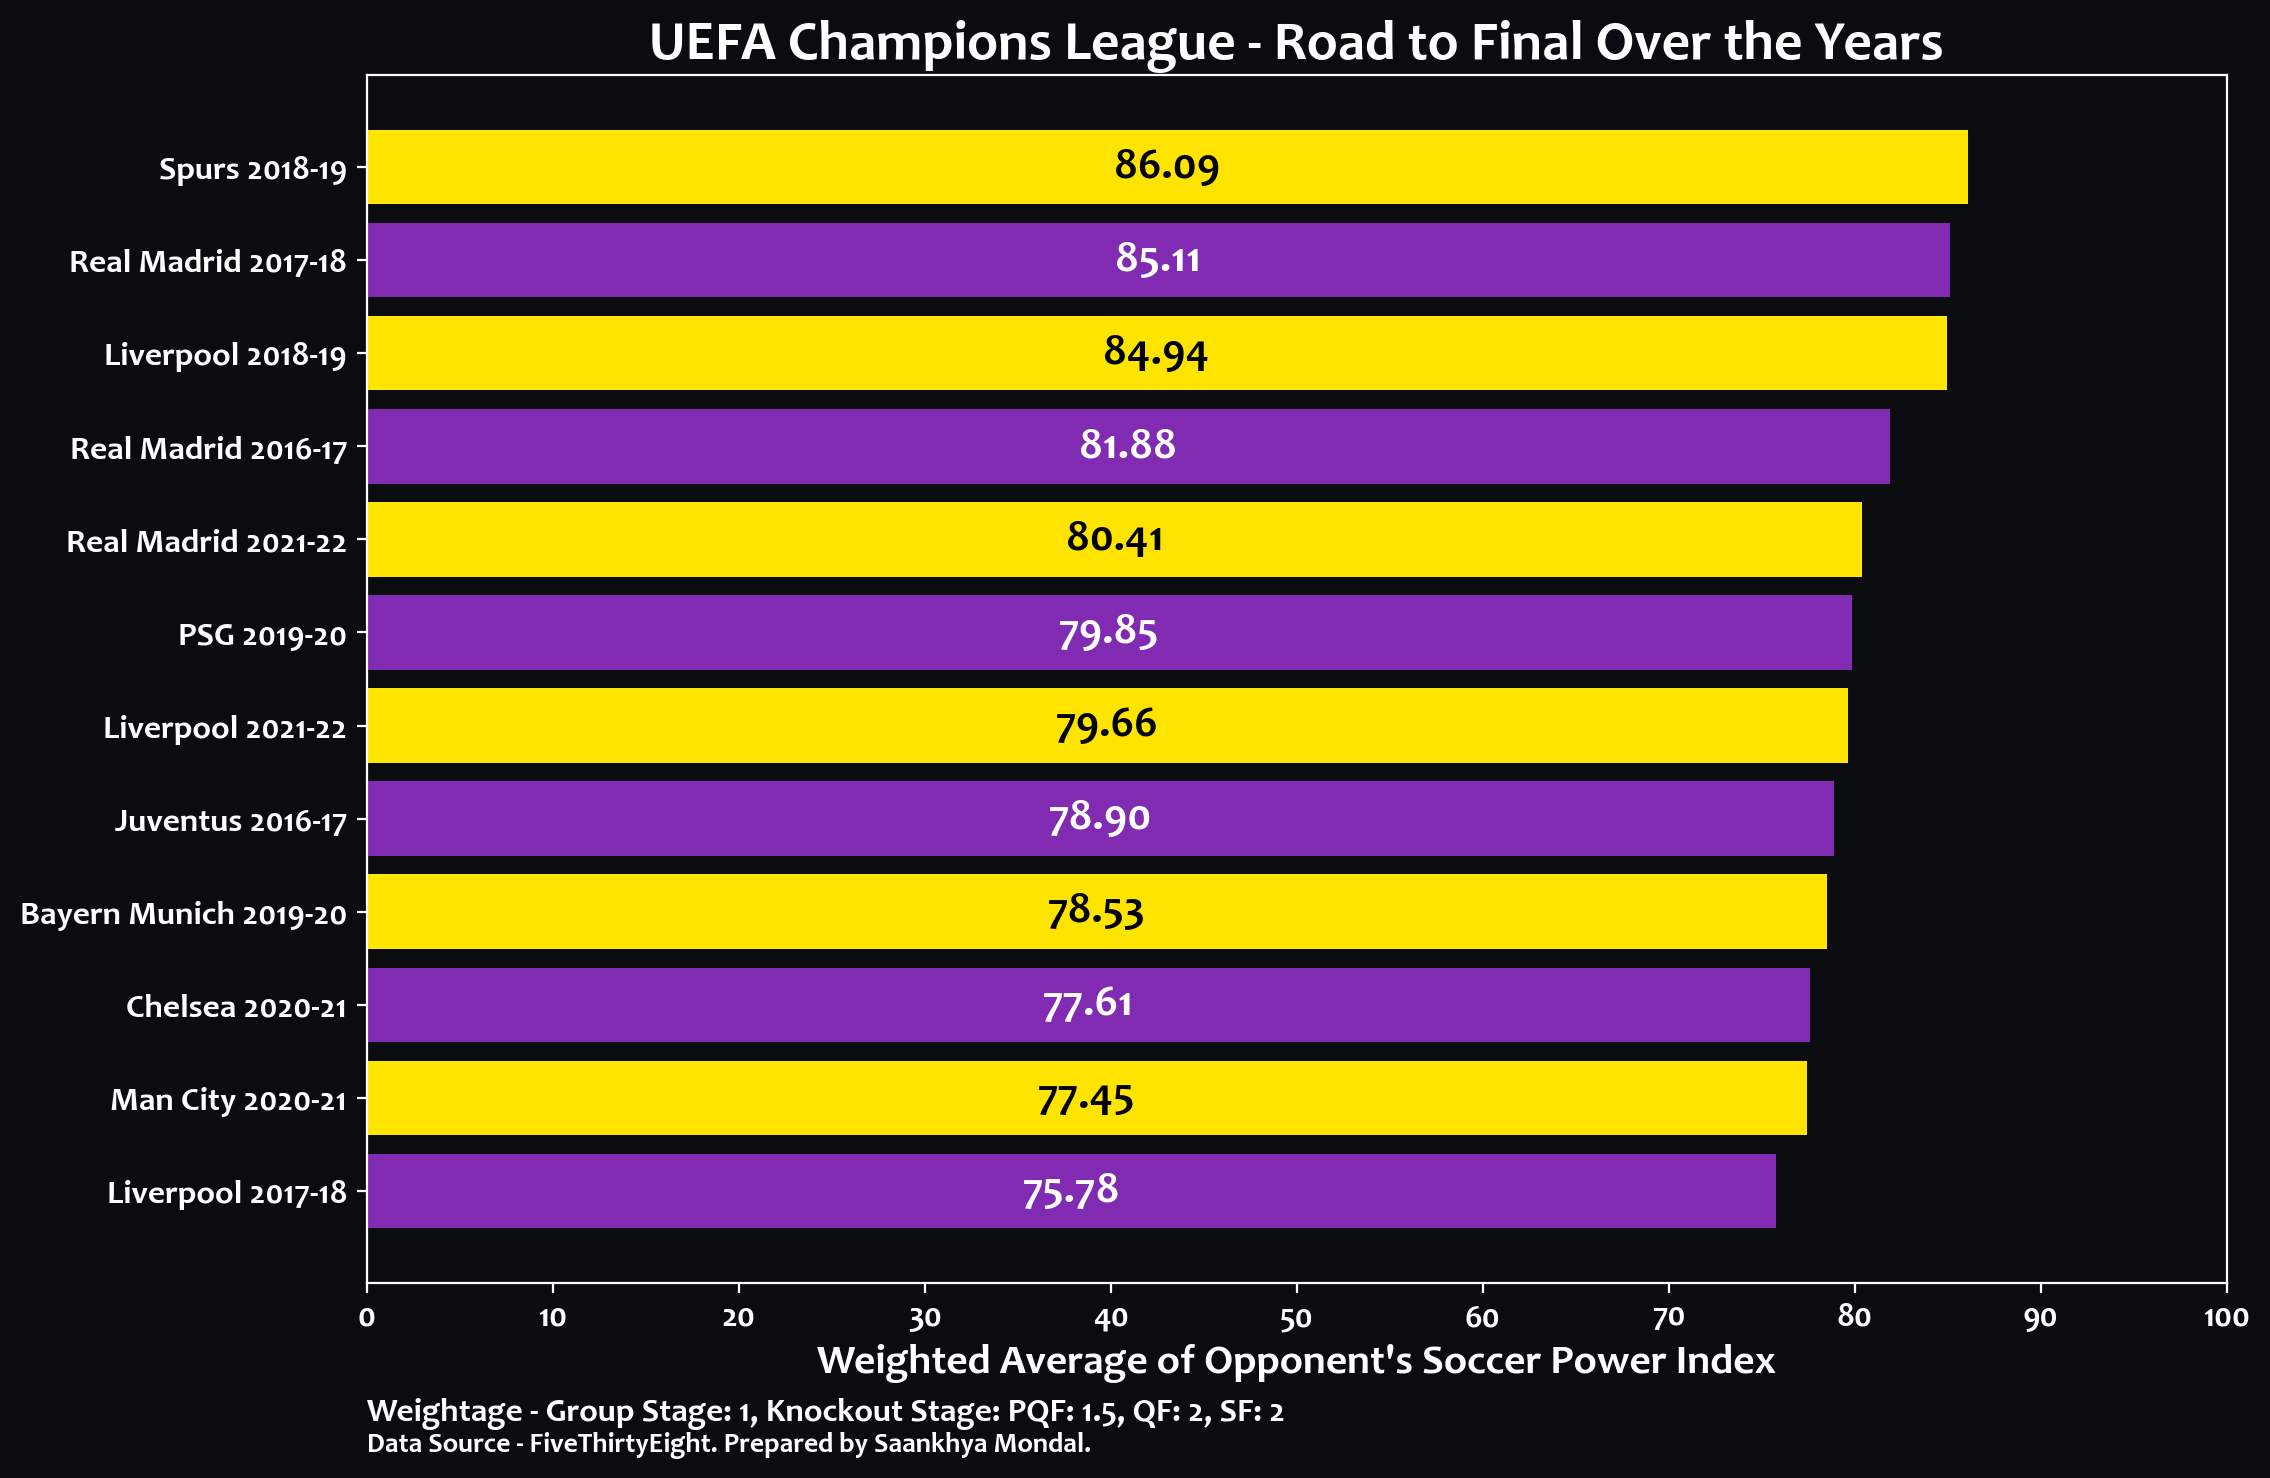

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#0b0c10')
fig.set_facecolor('#0b0c10')
fig.set_edgecolor('#0b0c10')

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
mpl.rcParams.update(params)

c = ['#802bb1', '#ffe400']*12
ax.barh(teams, index, color=c)
c = ['white', 'black']*12
for p in range(12):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    aaaa = index[p]
    ax.text(x + width/2, 
            y+height/2, 
            str('{:.2f}'.format(aaaa)),
            horizontalalignment='center', 
            verticalalignment='center',
            color=c[p],
            fontsize=16)

ax.set_title('UEFA Champions League - Road to Final Over the Years', fontsize=20, c='white')
ax.set_xticks([i for i in range(0, 101, 10)])
ax.set_xlabel('Weighted Average of Opponent\'s Soccer Power Index', fontsize=15)
fig.text(0.125,0.04,'Weightage - Group Stage: 1, Knockout Stage: PQF: 1.5, QF: 2, SF: 2', size = 12, c='white')
fig.text(0.125,0.02,'Data Source - FiveThirtyEight. Prepared by Saankhya Mondal.', size=10, c='white')

In [10]:
fig.savefig('Images/UCL_RTF.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())

In [21]:
index = []
teams = ['Real Madrid 2016-17', 'Juventus 2016-17', 
         'Real Madrid 2017-18', 'Liverpool 2017-18', 
         'Liverpool 2018-19', 'Spurs 2018-19',
         'Bayern Munich 2019-20', 'PSG 2019-20',
         'Chelsea 2020-21', 'Man City 2020-21', 
         'Real Madrid 2021-22', 'Liverpool 2021-22']
factor = [0, 0, 0, 1, 4/3, 4/3]*2
factor_2019 = [0, 0, 0, 1]*2 + [4/3, 4/3]
# factor= [1]*12
# factor_2019 = [1]*10
seasons = [2016, 2017, 2018, 2019, 2020, 2021]
for season in seasons:
    x = all[all['season'] == season]
    x1 = x[x['team1'] == finalists[season][0]]
    x2 = x[x['team2'] == finalists[season][0]]
    f = list(x1['spi2']) + list(x2['spi1'])
    if season == 2019:
        idx = [f[i]*factor_2019[i] for i in range(10)]
        total = sum(idx)/sum(factor_2019)
        index.append(total)
    else:
        idx = [f[i]*factor[i] for i in range(12)]
        total = sum(idx)/sum(factor)
        index.append(total)

    x1 = x[x['team1'] == finalists[season][1]]
    x2 = x[x['team2'] == finalists[season][1]]
    f = list(x1['spi2']) + list(x2['spi1'])
    if season == 2019:
        idx = [f[i]*factor_2019[i] for i in range(10)]
        total = sum(idx)/sum(factor_2019)
        index.append(total)
    else:
        idx = [f[i]*factor[i] for i in range(12)]
        total = sum(idx)/sum(factor)
        index.append(total)
index, teams

([88.80045454545456,
  85.27818181818184,
  90.83227272727274,
  83.94863636363638,
  88.08454545454548,
  86.99863636363638,
  83.77928571428572,
  84.69285714285715,
  81.83000000000001,
  80.35227272727272,
  88.85727272727274,
  79.06954545454546],
 ['Real Madrid 2016-17',
  'Juventus 2016-17',
  'Real Madrid 2017-18',
  'Liverpool 2017-18',
  'Liverpool 2018-19',
  'Spurs 2018-19',
  'Bayern Munich 2019-20',
  'PSG 2019-20',
  'Chelsea 2020-21',
  'Man City 2020-21',
  'Real Madrid 2021-22',
  'Liverpool 2021-22'])

In [22]:
teams = [x for _, x in sorted(zip(index, teams))]
index.sort()

Text(0.125, 0.02, 'Data Source - FiveThirtyEight. Prepared by Saankhya Mondal.')

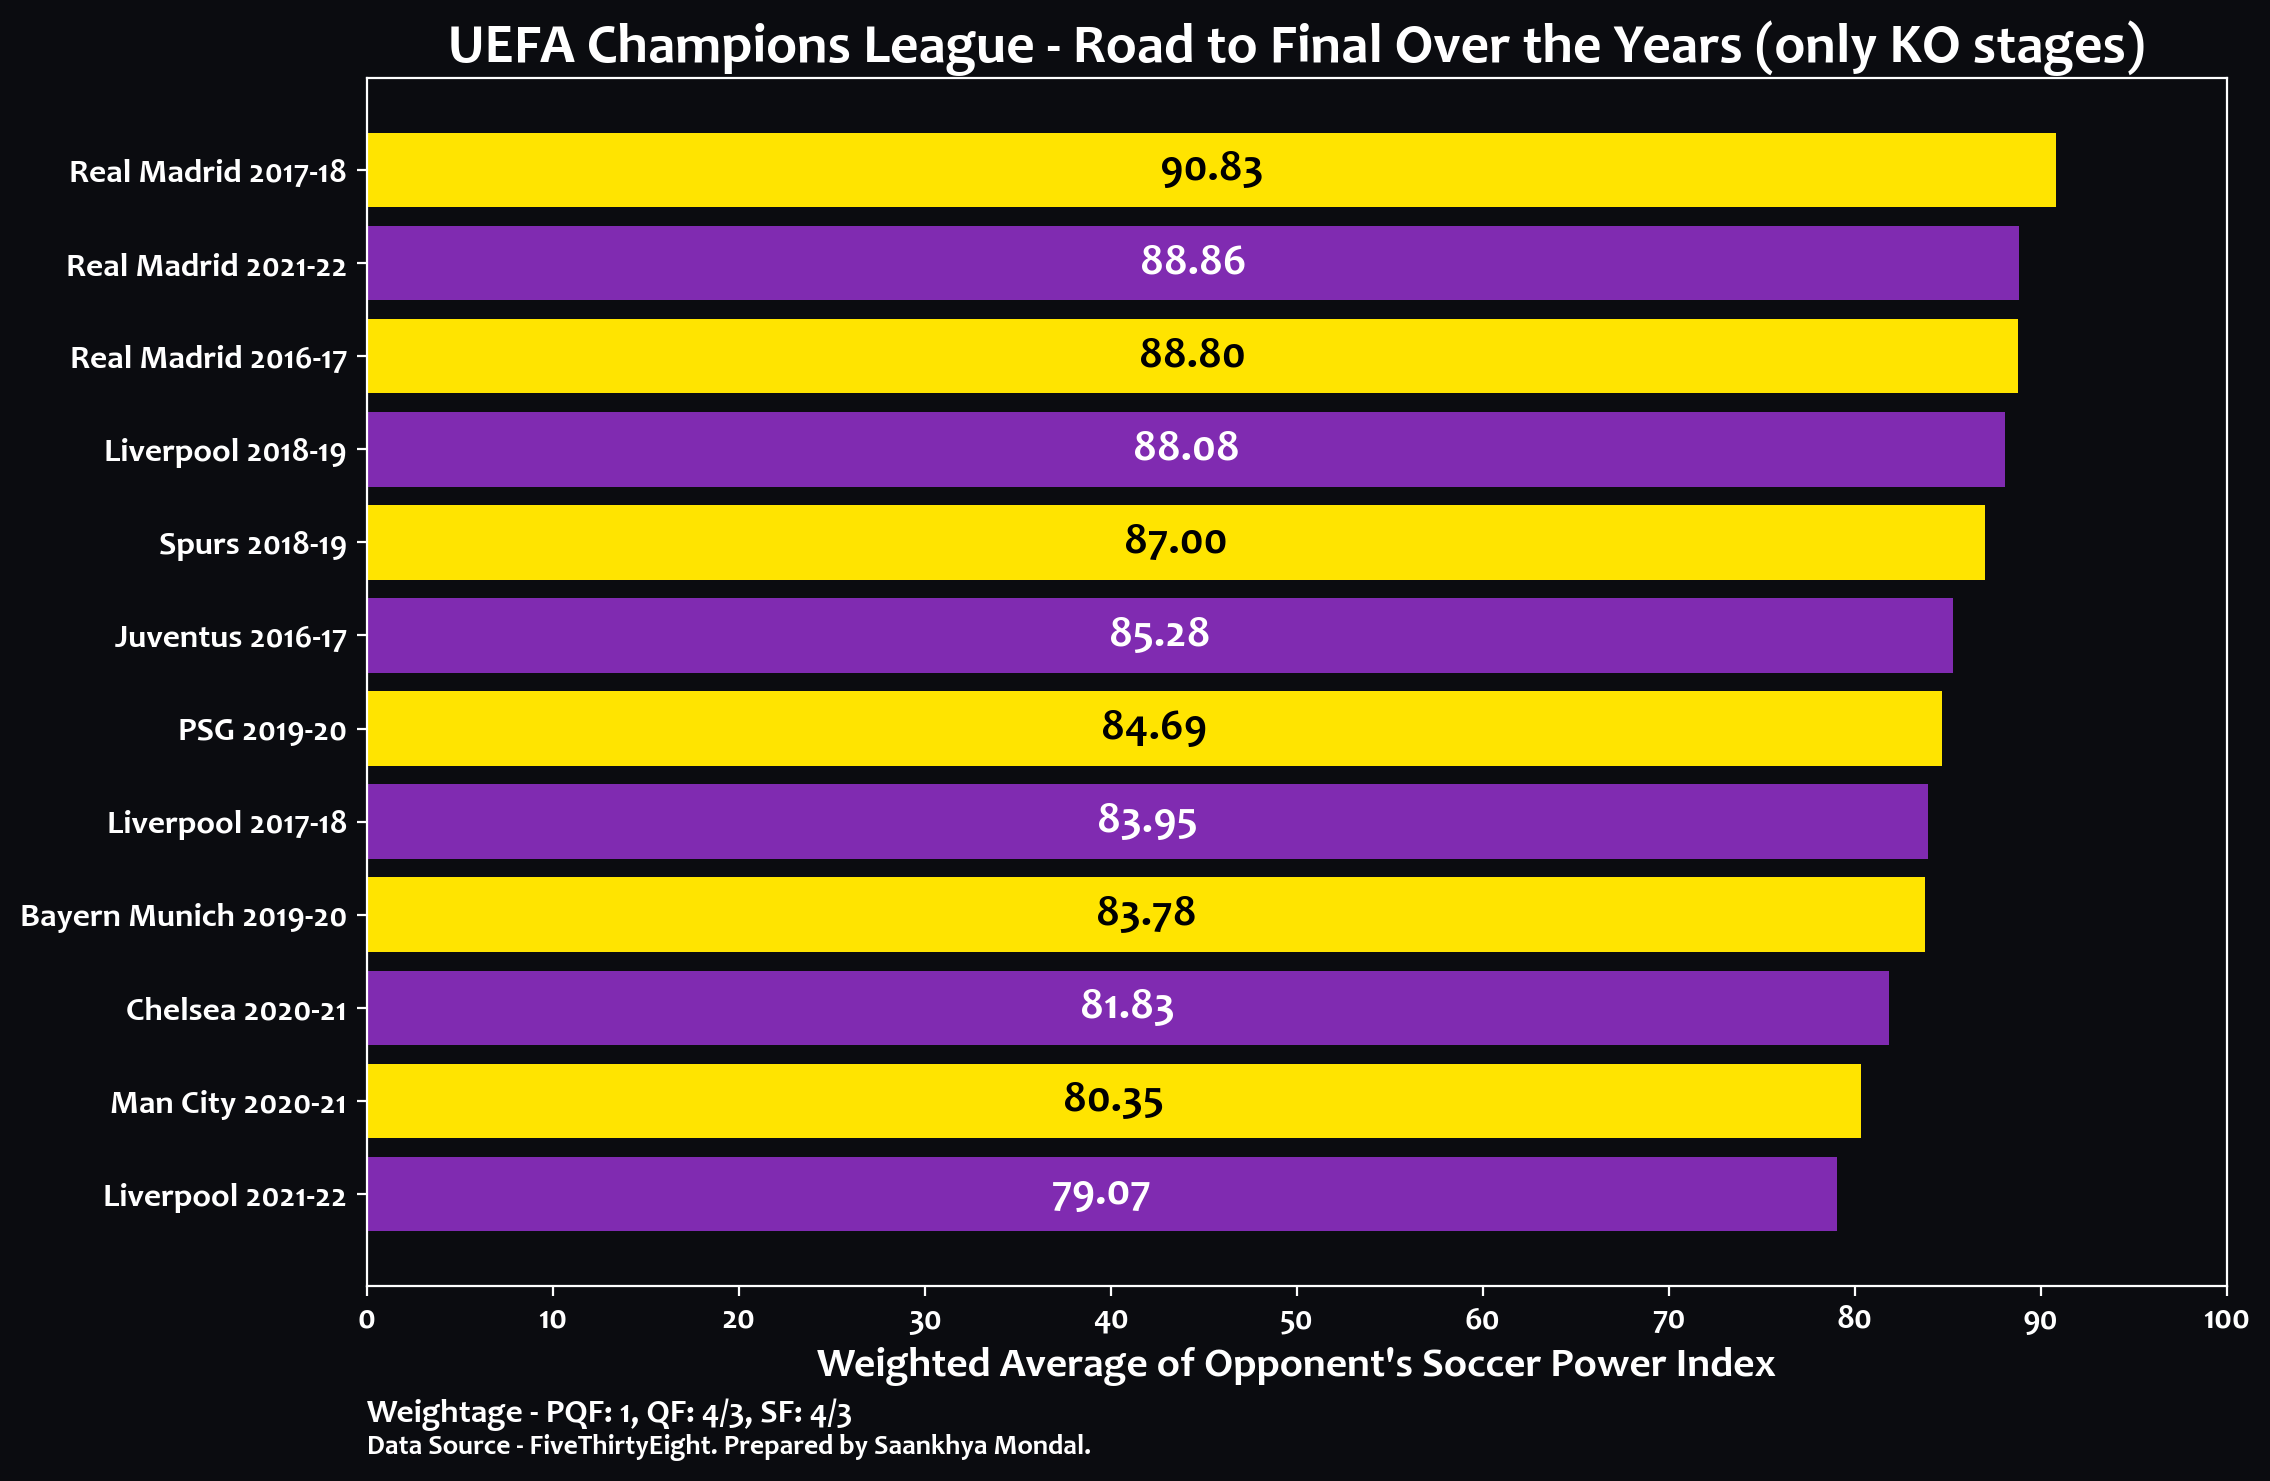

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#0b0c10')
fig.set_facecolor('#0b0c10')
fig.set_edgecolor('#0b0c10')

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
mpl.rcParams.update(params)

c = ['#802bb1', '#ffe400']*12
ax.barh(teams, index, color=c)
c = ['white', 'black']*12
for p in range(12):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    aaaa = index[p]
    ax.text(x + width/2, 
            y+height/2, 
            str('{:.2f}'.format(aaaa)),
            horizontalalignment='center', 
            verticalalignment='center',
            color=c[p],
            fontsize=16)

ax.set_title('UEFA Champions League - Road to Final Over the Years (only KO stages)', fontsize=20, c='white')
ax.set_xticks([i for i in range(0, 101, 10)])
ax.set_xlabel('Weighted Average of Opponent\'s Soccer Power Index', fontsize=15)
fig.text(0.125,0.04,'Weightage - PQF: 1, QF: 4/3, SF: 4/3', size = 12, c='white')
fig.text(0.125,0.02,'Data Source - FiveThirtyEight. Prepared by Saankhya Mondal.', size=10, c='white')

In [26]:
fig.savefig('Images/UCL_RTF_KS.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())

In [11]:
all[all['season'] == 2018]

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
13327,2018,2018-09-18,1818,UEFA Champions League,Liverpool,Paris Saint-Germain,90.42,87.95,0.5227,0.2439,...,61.3,62.1,3.0,2.0,2.38,1.20,1.93,0.71,3.15,2.10
13313,2018,2018-09-18,1818,UEFA Champions League,Internazionale,Tottenham Hotspur,80.18,84.87,0.4034,0.3401,...,82.9,87.3,2.0,1.0,1.40,0.88,1.72,0.90,2.10,1.05
14110,2018,2018-10-03,1818,UEFA Champions League,Tottenham Hotspur,Barcelona,85.15,92.19,0.3690,0.3980,...,73.9,42.4,2.0,4.0,0.51,1.92,0.95,2.15,2.10,3.70
14115,2018,2018-10-03,1818,UEFA Champions League,Napoli,Liverpool,83.49,91.14,0.3676,0.3695,...,68.9,40.9,1.0,0.0,1.96,0.17,1.15,0.71,1.05,0.00
14848,2018,2018-10-24,1818,UEFA Champions League,Liverpool,Red Star Belgrade,90.34,64.74,0.8515,0.0258,...,75.1,35.6,4.0,0.0,4.93,0.53,2.56,0.62,3.96,0.00
14839,2018,2018-10-24,1818,UEFA Champions League,PSV,Tottenham Hotspur,81.34,84.06,0.4557,0.3204,...,58.8,58.2,2.0,2.0,0.98,2.54,0.50,1.95,1.89,2.10
15494,2018,2018-11-06,1818,UEFA Champions League,Tottenham Hotspur,PSV,83.29,79.54,0.5276,0.2545,...,87.1,85.8,2.0,1.0,3.71,0.62,3.45,0.96,2.10,1.05
15484,2018,2018-11-06,1818,UEFA Champions League,Red Star Belgrade,Liverpool,63.73,90.82,0.1256,0.6735,...,14.4,46.3,2.0,0.0,0.78,2.49,0.67,2.66,2.10,0.00
16169,2018,2018-11-28,1818,UEFA Champions League,Paris Saint-Germain,Liverpool,89.92,91.04,0.4648,0.2917,...,100.0,100.0,2.0,1.0,2.12,1.35,0.85,1.16,2.10,1.05
16163,2018,2018-11-28,1818,UEFA Champions League,Tottenham Hotspur,Internazionale,85.66,81.64,0.5421,0.2218,...,90.6,90.6,1.0,0.0,1.49,0.95,1.58,0.87,1.05,0.00
